In [1]:
import math
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sys
import seaborn as sns

from PIL import Image

In [2]:
sys.version

'3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]'

In [3]:
import datetime

print("Today is", datetime.datetime.today())

Today is 2024-02-26 14:59:49.703931


In [4]:
endpoint = "https://computer-vision-msft.cognitiveservices.azure.com"
version = "?api-version=2023-02-01-preview"

vec_img_url = endpoint + "/computervision/retrieval:vectorizeImage" + version  # For doing the image vectorization
vec_txt_url = endpoint + "/computervision/retrieval:vectorizeText" + version  # For the prompt vectorization

headers = {
    'Content-type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'd395f4b6ace44e64873f522b4c507630'
}

In [5]:
def image_embedding(imageurl):
    """
    Embedding image using Azure CV 4.0
    """
    image = {"url": imageurl}
    print(f'image : {image}')
    print(f'vec_img_url : {vec_img_url} ')
    r = requests.post(vec_img_url, data=json.dumps(image), headers=headers)
    print(r)
    image_emb = r.json()['vector']

    return image_emb

In [21]:
def text_embedding(promptxt):
    """
    Embedding text using Azure CV 4.0
    """
    prompt = {'text': promptxt}
    print(f'url : {vec_txt_url}')
    print(f'prompt : {prompt}')
    r = requests.post(vec_txt_url, data=json.dumps(prompt), headers=headers)
    text_emb = r.json()['vector']

    return text_emb

In [7]:
def get_cosine_similarity(vector1, vector2):
    """
    Get cosine similarity value
    """
    dot_product = 0
    length = min(len(vector1), len(vector2))

    for i in range(length):
        dot_product += vector1[i] * vector2[i]

    magnitude1 = math.sqrt(sum(x * x for x in vector1))
    magnitude2 = math.sqrt(sum(x * x for x in vector2))
    similarity = dot_product / (magnitude1 * magnitude2)

    return similarity

In [8]:
def similarity_results(image_emb, prompts):
    """"
    Get similarity results
    """
    simil_values_list = [
        get_cosine_similarity(image_emb, text_embedding(prompt))
        for prompt in prompts
    ]
    sorted_results = sorted(zip(prompts, simil_values_list),
                            key=lambda x: x[1],
                            reverse=True)

    df = pd.DataFrame(columns=['prompt', 'similarity'])
    for idx, (prompt, simil_val) in enumerate(sorted_results):
        df.loc[idx, 'prompt'] = prompt
        df.loc[idx, 'similarity'] = simil_val

    df["similarity"] = df.similarity.astype(float)

    return df

image : {'url': 'https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


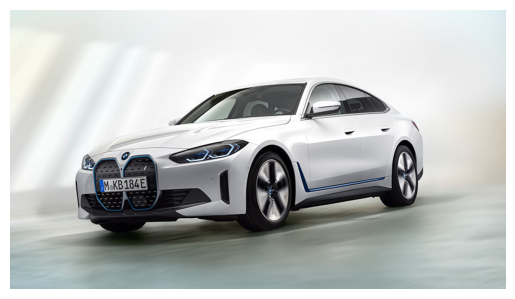

In [9]:
imageurl1 = "https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true"
image_emb1 = image_embedding(imageurl1)

plt.imshow(Image.open(requests.get(imageurl1, stream=True).raw))
plt.axis('off')
plt.show()

In [10]:

text1 = text_embedding("a dog")

In [11]:
get_cosine_similarity(image_emb1, text1)

0.11476304715138874

In [12]:
text2 = text_embedding("a car")

In [13]:
get_cosine_similarity(image_emb1, text2)

0.2682301177175824

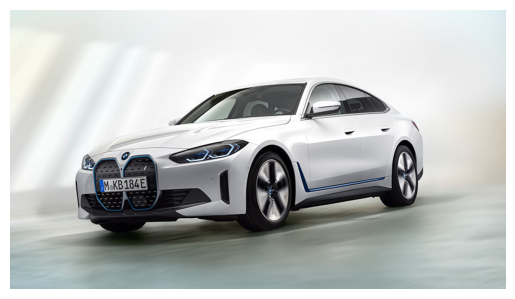

In [14]:
plt.imshow(Image.open(requests.get(imageurl1, stream=True).raw))
plt.axis('off')
plt.show()

In [15]:
prompts = [
    'bird', 'a truck', 'a car', 'a blue car', 'a white car', 'a BMW white car',
    'a tesla car', 'a mercedes car', 'a man', 'a ford car'
]

In [17]:

df = similarity_results(image_emb1, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

,prompt,similarity
0,a BMW white car,0.348688
1,a white car,0.311255
2,a blue car,0.271831
3,a car,0.268230
4,a tesla car,0.226990
5,a ford car,0.225908
6,a mercedes car,0.221688
7,a truck,0.159486
8,a man,0.151245
9,bird,0.136960


image : {'url': 'https://github.com/retkowsky/images/blob/master/xboxps5.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


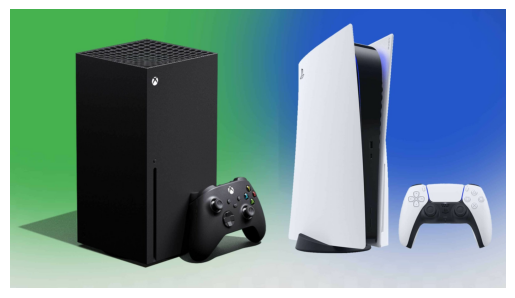

In [18]:
imageurl2 = "https://github.com/retkowsky/images/blob/master/xboxps5.jpg?raw=true"
image_emb2 = image_embedding(imageurl2)

plt.imshow(Image.open(requests.get(imageurl2, stream=True).raw))
plt.axis('off')
plt.show()

In [19]:
prompts = [
    'PS5', 'Xbox', 'play station', 'Sony', 'controller', 'Microsoft',
    'games console', 'guitar', 'fish', 'apple', 'car', 'street', 'truck',
    'Miami', 'black controller', 'white controller'
]

In [22]:
df = similarity_results(image_emb2, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'PS5'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'Xbox'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'play station'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'Sony'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'controller'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'Microsoft'}
url : https://computer-visio

,prompt,similarity
0,Xbox,0.312546
1,games console,0.310356
2,PS5,0.296821
3,white controller,0.275309
4,Microsoft,0.272782
5,controller,0.268210
6,play station,0.263904
7,black controller,0.242190
8,Sony,0.242132
9,truck,0.133857


image : {'url': 'https://github.com/retkowsky/images/blob/master/sodas.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


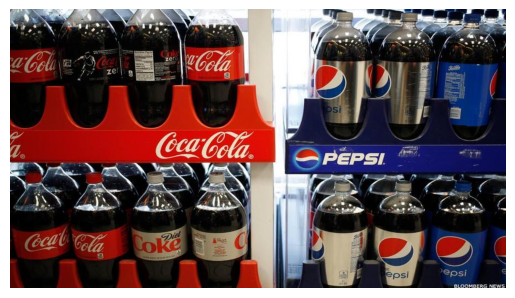

In [23]:
imageurl3 = "https://github.com/retkowsky/images/blob/master/sodas.jpg?raw=true"
image_emb3 = image_embedding(imageurl3)

plt.imshow(Image.open(requests.get(imageurl3, stream=True).raw))
plt.axis('off')
plt.show()

In [24]:
prompts = [
    'a can', 'coca cola', 'pepsi', '7 up', 'water', 'wine', 'beer', 'gin',
    'alcohol', 'lemon', 'drink', 'I do not know', 'food', 'soda bottles', 'coke bottle'
]

In [26]:
df = similarity_results(image_emb3, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'a can'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'coca cola'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'pepsi'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': '7 up'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'water'}
url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeText?api-version=2023-02-01-preview
prompt : {'text': 'wine'}
url : https://computer-vision-msft.cog

,prompt,similarity
0,soda bottles,0.319968
1,pepsi,0.315091
2,coke bottle,0.288247
3,coca cola,0.285268
4,drink,0.217764
5,alcohol,0.212938
6,7 up,0.203230
7,food,0.171633
8,beer,0.170316
9,a can,0.165780


image : {'url': 'https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


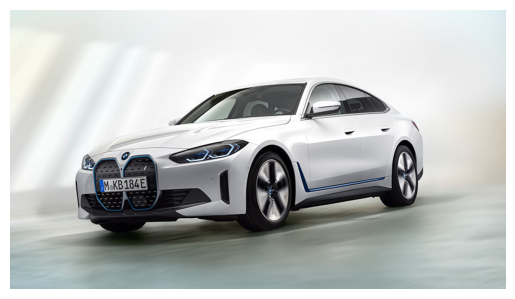

In [27]:
imageurl4 = "https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true"
image_emb4 = image_embedding(imageurl4)

plt.imshow(Image.open(requests.get(imageurl4, stream=True).raw))
plt.axis('off')
plt.show()

image : {'url': 'https://github.com/retkowsky/images/blob/master/i4_2.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


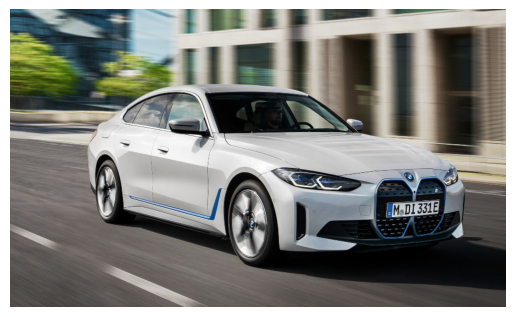

In [28]:
imageurl5 = "https://github.com/retkowsky/images/blob/master/i4_2.jpg?raw=true"
whitebmw = image_embedding(imageurl5)

plt.imshow(Image.open(requests.get(imageurl5, stream=True).raw))
plt.axis('off')
plt.show()

image : {'url': 'https://github.com/retkowsky/images/blob/master/cat.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


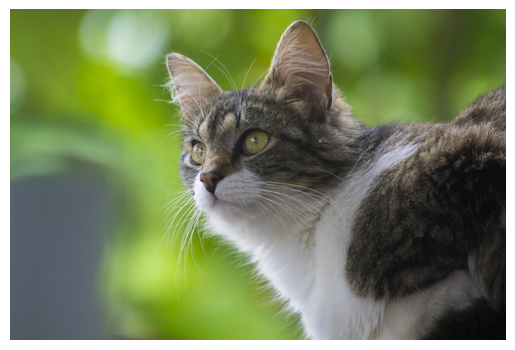

In [29]:
imageurl6 = "https://github.com/retkowsky/images/blob/master/cat.jpg?raw=true"
cat = image_embedding(imageurl6)

plt.imshow(Image.open(requests.get(imageurl6, stream=True).raw))
plt.axis('off')
plt.show()

image : {'url': 'https://raw.githubusercontent.com/wangil/github_tutorial/main/MSFT/dog.jpg'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


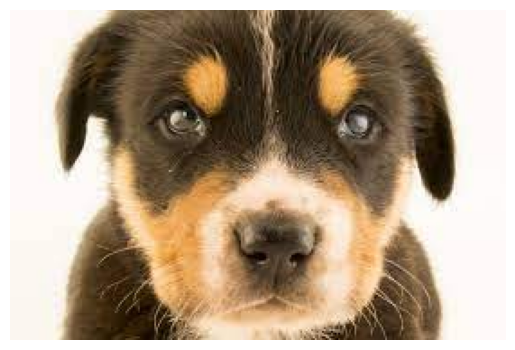

In [35]:
imageurl7 = "https://raw.githubusercontent.com/wangil/github_tutorial/main/MSFT/dog.jpg"
dog = image_embedding(imageurl7)

plt.imshow(Image.open(requests.get(imageurl7, stream=True).raw))
plt.axis('off')
plt.show()

In [30]:

get_cosine_similarity(image_emb4, whitebmw)

0.947223459004385

In [31]:
get_cosine_similarity(image_emb4, cat)

0.3335299158844417

In [36]:
get_cosine_similarity(image_emb4, dog)

0.27739584186195504